# Анализ распределения (частот)

© В.Ю.Арьков

## Анализ числовых данных. Распределение, гистограмма и кумулята

### Генерируем данные

Нормальное распределение:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

In [ ]:
# Загружаем библиотеку numpy
import numpy as np

In [ ]:
# numpy.random.seed
# random.seed(self, seed=None)

# Номер зачётки - начальное состояние генератора
np.random.seed(123454)

# numpy.random.normal
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# random.normal(loc=0.0, scale=1.0, size=None)

# Среднее значение (математическое ожидание)
mu = 100

# Сигма (стандартное отклонение)
sigma = 10

# Размер (объём) выборки
N = 10000

# Генератор случайных чисел с нормальным распределением
x = np.random.normal(mu, sigma, N)

In [ ]:
# новые функции
# Номер зачётки - начальное состояние генератора
seed = 123456789

# Среднее значение (математическое ожидание)
mu = 100

# Сигма (стандартное отклонение)
sigma = 10

# Размер (объём) выборки
N = 10000

# Генератор случайных чисел с нормальным распределением
x = np.random.default_rng(seed).normal(mu, sigma, size=N)

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

# Загружаем графическую библиотеку
import matplotlib.pyplot as plt

(array([   7.,   83.,  483., 1631., 2952., 2936., 1461.,  386.,   55.,
           6.]), array([ 59.1823327 ,  67.45063739,  75.71894207,  83.98724676,
         92.25555144, 100.52385613, 108.79216081, 117.0604655 ,
        125.32877018, 133.59707487, 141.86537955]), <BarContainer object of 10 artists>)

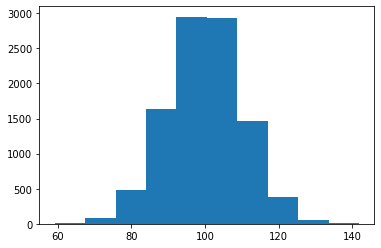

In [ ]:
# Подбираем число интервалов группировки
n = 10

# Гистограмма распределения
plt.hist(x, n)

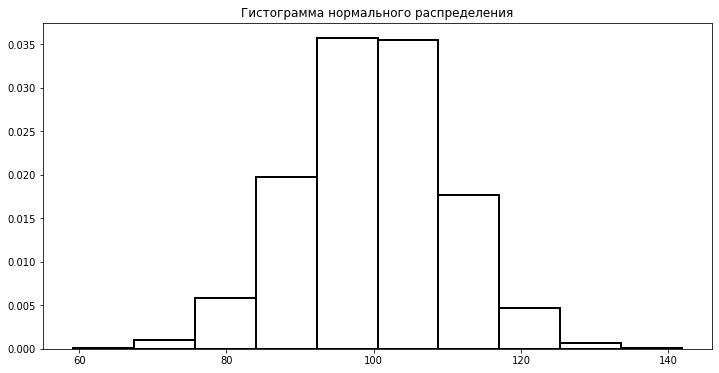

In [ ]:
# Размеры графика в дюймах
plt.figure(figsize=(12, 6))

# Цвет и толщина линий, цвет заливки столбиков
plt.hist(x, bins=n, edgecolor='black', linewidth=2, facecolor='white', density=True)

# Заголовок графика
plt.title("Гистограмма нормального распределения")

# Не выводить результаты группировки данных на экран
plt.show()

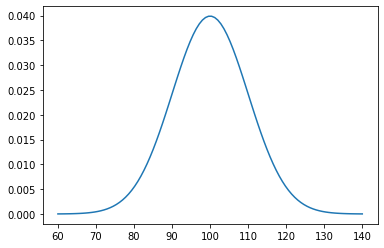

In [ ]:
# Загружаем нормальное распределение
from scipy.stats import norm

# Массив заданного количества "иксов" для графика
xx = np.linspace(60, 140, 100)

# График плотности вероятности нормального распределения
plt.plot(xx, norm.pdf(xx, loc=mu, scale=sigma))
plt.show()

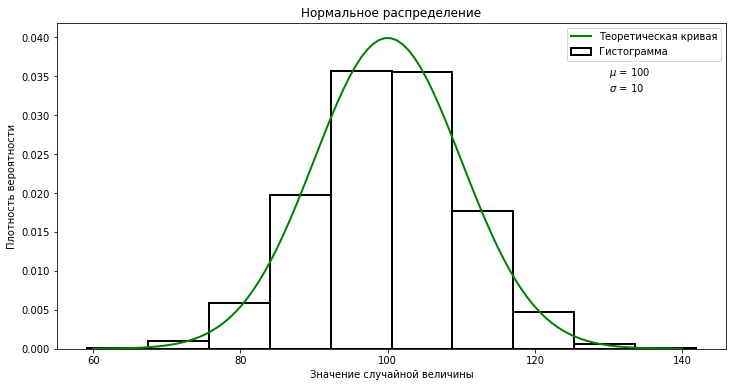

In [ ]:
# Совмещаем гистограмму и теоретический график
plt.figure(figsize=(12, 6))
plt.hist(x, bins=n, edgecolor='black', linewidth=2, facecolor='white', density=True, label='Гистограмма')
plt.plot(xx, norm.pdf(xx, loc=mu, scale=sigma), color="green", linewidth=2, label="Теоретическая кривая")
plt.title("Нормальное распределение")
plt.legend()
plt.xlabel("Значение случайной величины")
plt.ylabel("Плотность вероятности")
plt.text(x=130, y=0.033, s=f"$\mu$ = {mu}\n$\sigma$ = {sigma}")
plt.savefig("norm_distr.jpg", dpi=300)
plt.show()

In [ ]:
import seaborn as sns

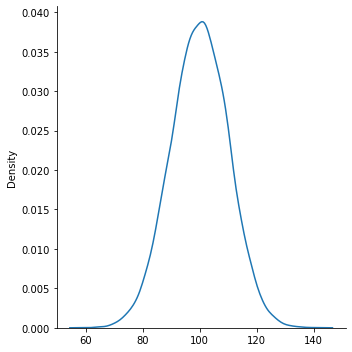

In [ ]:
sns.displot(x, kind="kde")
plt.show()

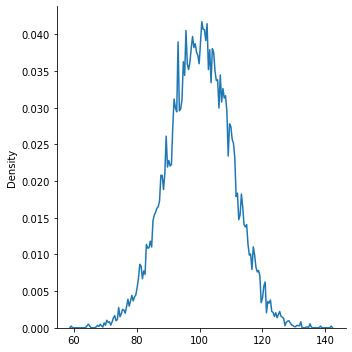

In [ ]:
sns.displot(x, kind="kde", bw_adjust=0.1)
plt.show()

<Figure size 576x288 with 0 Axes>

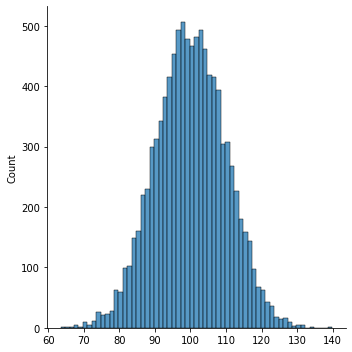

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(x)

# seaborn.displot(data=None, *, x=None, y
# histplot() (with kind="hist"; the default)
# kdeplot() (with kind="kde")
# ecdfplot() (with kind="ecdf"; univariate-only)
plt.show()

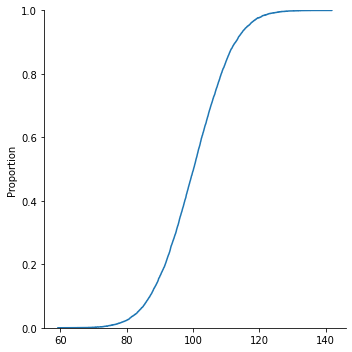

In [ ]:
sns.displot(x, kind="ecdf")
plt.show()

(array([7.000e-04, 9.000e-03, 5.730e-02, 2.204e-01, 5.156e-01, 8.092e-01,
        9.553e-01, 9.939e-01, 9.994e-01, 1.000e+00]),
 array([ 59.1823327 ,  67.45063739,  75.71894207,  83.98724676,
         92.25555144, 100.52385613, 108.79216081, 117.0604655 ,
        125.32877018, 133.59707487, 141.86537955]),
 <BarContainer object of 10 artists>)

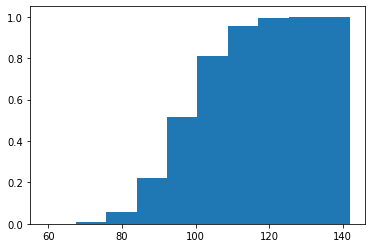

In [ ]:
plt.hist(x, bins=n, density=True, cumulative=True)

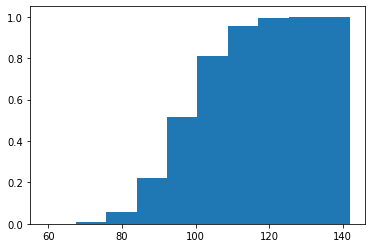

In [ ]:
(C_cum, x_cum, p_cum) = plt.hist(x, bins=n, 
                                 density=True, 
                                 cumulative=True)

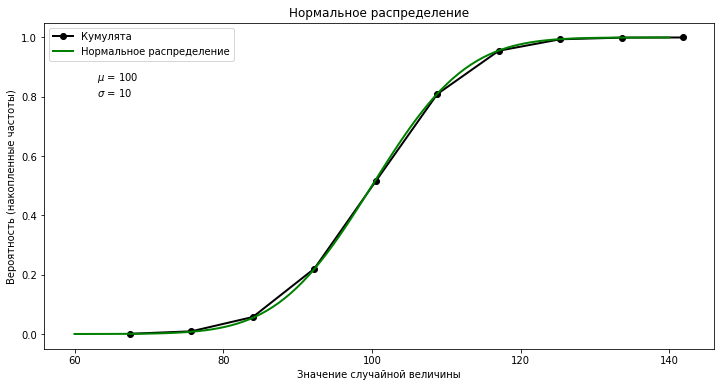

In [ ]:
# Кумулята и функция нормального распределения
plt.figure(figsize=(12, 6))
plt.plot(x_cum[1:], C_cum, color='black', linewidth=2, label='Кумулята', marker='o')
С = norm.cdf(xx, loc=mu, scale=sigma)
plt.plot(xx, С, color="green", linewidth=2, label="Нормальное распределение")
plt.title("Нормальное распределение")
plt.legend()
plt.xlabel("Значение случайной величины")
plt.ylabel("Вероятность (накопленные частоты)")
plt.text(x=63, y=0.8, s=f"$\mu$ = {mu}\n$\sigma$ = {sigma}")
plt.show()

## Частотный анализ текста. Гистограмма и облако слов. Версия 1

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
text = """Statistics
Machine Learning
Big Data
Deep Learning
Neural Nets
Regression
Classification
Clustering
Dimension Reduction
Professor Arkov"""

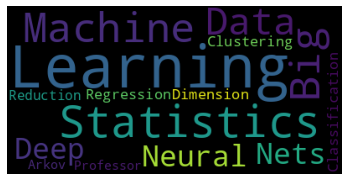

In [ ]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
ww = np.eye(50)
ww

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

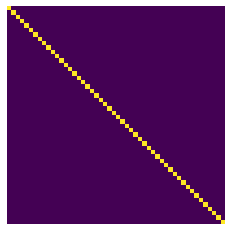

In [ ]:
plt.imshow(ww)
plt.axis("off")
plt.show()

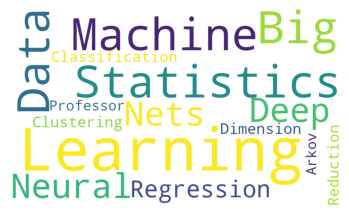

In [ ]:
wordcloud = WordCloud(width=1000, height=600, 
              background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from PIL import Image
from google.colab import files
uploaded = files.upload()

In [ ]:
!ls

mask.jpg  sample_data


In [ ]:
oval_mask = np.array(Image.open("mask.jpg"))

In [ ]:
type(oval_mask)

numpy.ndarray

In [ ]:
oval_mask.shape

(1406, 2010, 3)

In [ ]:
oval_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

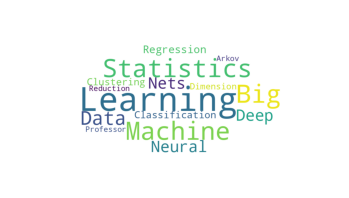

In [ ]:
wordcloud3 = WordCloud(width=1000, height=600, 
                       background_color='white', 
                       mask=oval_mask).generate(text)
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
wordcloud3.to_file("cloud.jpg")

In [ ]:
text = """Statistics
Machine_Learning
Big_Data
Deep_Learning
Neural_Nets
Regression
Classification
Clustering
Dimension_Reduction
Professor_Arkov"""

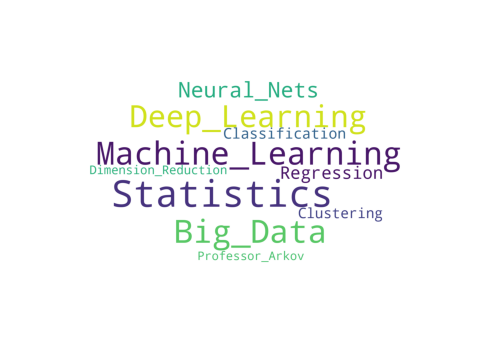

In [ ]:
wordcloud3 = WordCloud(width=2000, height=1200, 
                       background_color='white', 
                       mask=oval_mask).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
wordcloud3.to_file("cloud.jpg")

In [ ]:
dict_cloud = {'Statistics':20, 'Machine Learning':15, 
        'Big Data':8, 'Deep Learning':7, 
        'Neural Nets':6, 'Regression':5, 
        'Classification':4, 'Clustering':3, 
        'Dimension Reduction':2, 'Professor Arkov':1}

In [ ]:
dict_cloud

{'Statistics': 20,
 'Machine Learning': 15,
 'Big Data': 8,
 'Deep Learning': 7,
 'Neural Nets': 6,
 'Regression': 5,
 'Classification': 4,
 'Clustering': 3,
 'Dimension Reduction': 2,
 'Professor Arkov': 1}

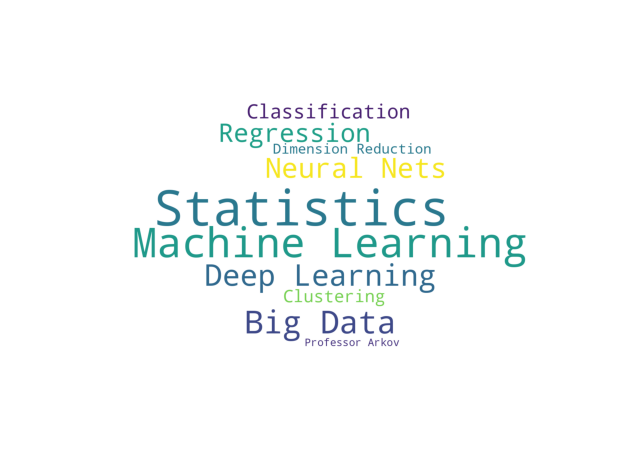

In [ ]:
wordcloud4 = WordCloud(width=1000, height=600, 
                       background_color='white', 
                mask=oval_mask).generate_from_frequencies(dict_cloud)
plt.figure(figsize=(18, 8))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

In [ ]:
wordcloud4.to_file("dict_cloud.jpg")

In [ ]:
!ls

cloud.jpg  dict_cloud.jpg  mask.jpg  sample_data


In [ ]:
files.download("dict_cloud.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dictRu = {'Статистика':20,
          'Машинное обучение':15, 
          'Большие данные':8, 
          'Глубокое обучение':7, 
          'Нейронные сети':6, 
          'Регрессия':5, 
          'Классификация':4, 
          'Кластеризация':3, 
          'Понижение размерности':2, 
          'профессор Арьков':1}

In [ ]:
dictRu

{'Статистика': 20,
 'Машинное обучение': 15,
 'Большие данные': 8,
 'Глубокое обучение': 7,
 'Нейронные сети': 6,
 'Регрессия': 5,
 'Классификация': 4,
 'Кластеризация': 3,
 'Понижение размерности': 2,
 'профессор Арьков': 1}

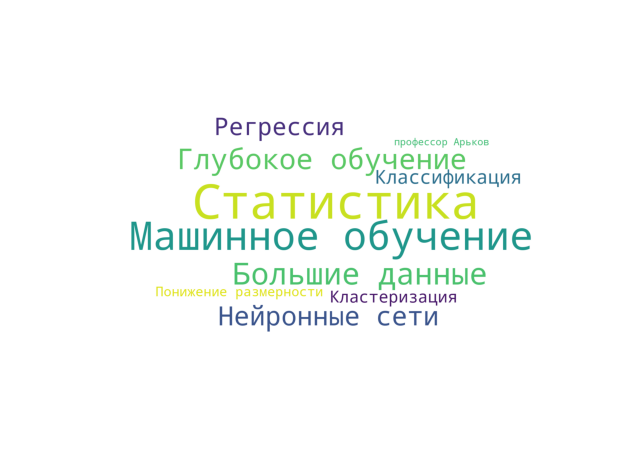

In [ ]:
wordcloud5 = WordCloud(width=1000, 
                       height=600, 
                       background_color='white', 
                       mask=oval_mask).generate_from_frequencies(dictRu)
plt.figure(figsize=(18, 8))
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

In [ ]:
wordcloud5.to_file("Ru_cloud.jpg")

In [ ]:
files.download("Ru_cloud.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Частотный анализ текста

Анализ расшифровки видеолекции по Бизнес-аналитике и статистике №1.

## Загрузка файла

In [ ]:
# Читаем текстовый файл
ff = open('/content/BI-01.txt', "r")
t0 = ff.read()

In [ ]:
t0

'итак название нашего предмета бизнес аналитика и статистика это вроде как две\nразные дисциплины ну как выясняется этот просто две стороны одного и того же вместе одной и\nтой же профессии одно и то же области первой теме моему недели они как раз эти\nмоменты начала я напомню\nну однако когда закончится на спорта с\nэпидемией будет мы вместо обычной которые пока у нас заняться\nну к сожалению по просьбе безопасности и здоровья не просто болеют люди мира это\nне люди вопросам будем хорошо у нас есть 10 указано три адреса интернете на самой\nадрес эта система дистанционного изучения готовим . все поможет все\nматериалы ссылки объявления обряды проходите то чтобы в конце семестра\nне читали какие-то остатки материалов у\nнас на сайте новую дату . и все знаем мы\nкое-что я буду дублировать на сайте орков narod.ru просто на случай выстаивать временно не будет работать\nсайтов иногда там проводятся технические работы\nобщей мир именно та штука но и работать\nмедленнее или часть затяжка\nзум

In [ ]:
# Размер текста - сравним со счетчиком MS Word
len(t0)

46934

In [ ]:
len?

In [ ]:
# Размер файла в байтах
!ls -la BI-01.txt

-rw-r--r-- 1 root root 86909 Mar 27 10:06 BI-01.txt


In [ ]:
87625 / 1024

85.5712890625

In [ ]:
# Начало файла
t0[:100]

'итак название нашего предмета бизнес аналитика и статистика это вроде как две\nразные дисциплины ну к'

In [ ]:
# Заменим символ перевода строки на пробел 
t1 = t0.replace('\n',' ')
t1[:100]

'итак название нашего предмета бизнес аналитика и статистика это вроде как две разные дисциплины ну к'

In [ ]:
len(t1)

46934

In [ ]:
type(t0)

str

## Облако слов без обработки

In [ ]:
# Загружаем библиотеки
from wordcloud import WordCloud
import matplotlib.pyplot as plt

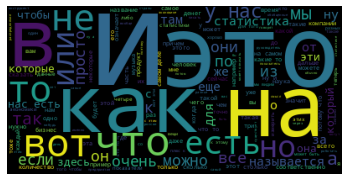

In [ ]:
# Облако слов по всему тексту
wordcloud = WordCloud().generate(t1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

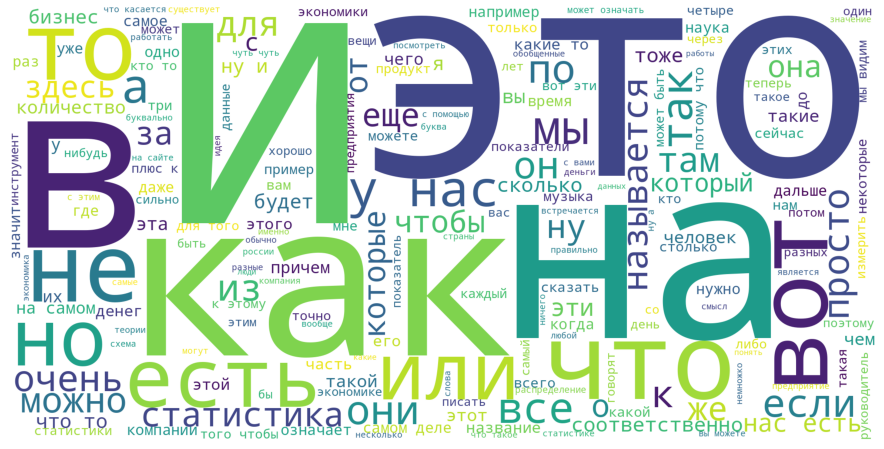

In [ ]:
# Белый фон, большие размеры
wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(t1)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
t2 = t1.split(" ")
t2[:10]

['итак',
 'название',
 'нашего',
 'предмета',
 'бизнес',
 'аналитика',
 'и',
 'статистика',
 'это',
 'вроде']

In [ ]:
import pandas as pd
x1 = pd.DataFrame(t2)
freq = x1.value_counts()
freq[:10]

и       224
это     149
на      125
что     118
в        92
как      91
вот      84
не       71
есть     70
нас      67
dtype: int64

In [ ]:
x2 = pd.DataFrame(freq, columns=["Frequency"])

In [ ]:
x2

Frequency
0                
и             224
это           149
на            125
что           118
в              92
...           ...
любите          1
лучшая          1
лучи            1
лозы            1
ящук            1

[2694 rows x 1 columns]

In [ ]:
x3 = x2.reset_index()
x3.rename(columns={0: "Word"}, inplace=True)
x3

Word  Frequency
0          и        224
1        это        149
2         на        125
3        что        118
4          в         92
...      ...        ...
2689  любите          1
2690  лучшая          1
2691    лучи          1
2692    лозы          1
2693    ящук          1

[2694 rows x 2 columns]

In [ ]:
x4 = x3.sort_values(by="Word")
x4.tail(7)

Word  Frequency
733     явно          2
732     язык          2
1243   языкe          1
247    языке          4
731   языком          2
1242  язычки          1
2693    ящук          1

In [ ]:
x5 = x4.Word.unique()
x5[:100]

array(['', ',', '.', '1', '1-го', '10', '11', '2', '2-ой', '20', '239',
       '3', '30', '36', '37', '4', '4-го', '5', '50', '500', '6', '70',
       '9000', '[музыка]', 'ap', 'avanti', 'awards', 'b', 'be', 'bi',
       'business', 'call', 'cd', 'choco', 'cicada', 'classic', 'color',
       'come', 'cotto', 'dark', 'deity', 'dirol', 'distribution',
       'fashion', 'ford', 'freely', 'he', 'intelligence', 'iso', 'like',
       'microsoft', 'narod.ru', 'nuxe', 'of', 'omega', 'orbea', 'others',
       'pie', 'power', 'slow', 'teen', 'this', 'to', 'touch', 'up',
       'white', 'world', 'xi', 'xiii', 'z', 'а', 'абсурда', 'августа',
       'авто', 'автоинспекция', 'автомобиль', 'автомобиля', 'авторы',
       'агентов', 'агентство', 'агрегирование', 'агрегирования', 'адрес',
       'адреса', 'аккуратно', 'акра', 'акта', 'активно', 'алфавит',
       'алфавите', 'альтернативное', 'альфа', 'альфа-самец',
       'американские', 'американский', 'американских', 'американской',
       'америке', 

In [ ]:
# Оставим только буквы, пробелы и чёрточки
alpha = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя -"
t5=''.join(x for x in t1 if x in alpha)
t5

'итак название нашего предмета бизнес аналитика и статистика это вроде как две разные дисциплины ну как выясняется этот просто две стороны одного и того же вместе одной и той же профессии одно и то же области первой теме моему недели они как раз эти моменты начала я напомню ну однако когда закончится на спорта с эпидемией будет мы вместо обычной которые пока у нас заняться ну к сожалению по просьбе безопасности и здоровья не просто болеют люди мира это не люди вопросам будем хорошо у нас есть  указано три адреса интернете на самой адрес эта система дистанционного изучения готовим  все поможет все материалы ссылки объявления обряды проходите то чтобы в конце семестра не читали какие-то остатки материалов у нас на сайте новую дату  и все знаем мы кое-что я буду дублировать на сайте орков  просто на случай выстаивать временно не будет работать сайтов иногда там проводятся технические работы общей мир именно та штука но и работать медленнее или часть затяжка зум здесь и на начнем с конца ч

In [ ]:
c = (x for x in t1 if x in alpha)
print(type(c))
list(c)[:10]

<class 'generator'>


['и', 'т', 'а', 'к', ' ', 'н', 'а', 'з', 'в', 'а']

In [ ]:
t6 = t5.split(" ")
x6 = pd.DataFrame(t6)
freq = x6.value_counts()
x7 = pd.DataFrame(freq, columns=["Frequency"])
x8 = x7.reset_index()
x8.rename(columns={0: "Word"}, inplace=True)
x9 = x8.sort_values(by="Word")
x10 = x9.Word.unique()
x10[:100]

array(['', '-го', '-ой', 'а', 'абсурда', 'августа', 'авто',
       'автоинспекция', 'автомобиль', 'автомобиля', 'авторы', 'агентов',
       'агентство', 'агрегирование', 'агрегирования', 'адрес', 'адреса',
       'аккуратно', 'акра', 'акта', 'активно', 'алфавит', 'алфавите',
       'альтернативное', 'альфа', 'альфа-самец', 'американские',
       'американский', 'американских', 'американской', 'америке',
       'анализ', 'анализа', 'аналитика', 'аналоги', 'анархию',
       'английски', 'английские', 'английского', 'английское',
       'английском', 'анри', 'аня', 'аппаратными', 'арктические',
       'аромат', 'базовых', 'балтики', 'банка', 'банке', 'бар', 'бара',
       'бед', 'без', 'безопасности', 'безработицы', 'бекки', 'берем',
       'берет', 'беру', 'бесплатно', 'бесплатное', 'библиотеки', 'бизнес',
       'бизнес-аналитик', 'бизнес-аналитика', 'бизнес-аналитики',
       'бизнес-процесс', 'бизнес-процессах', 'бизнес-тренер', 'бизнеса',
       'бизнесе', 'билетный', 'бирже', 'блага

In [ ]:
x10.shape

(2626,)

In [ ]:
x10

array(['', '-го', '-ой', ..., 'языком', 'язычки', 'ящук'], dtype=object)

## Лемматизация текста

Приводим слова к начальной / словарной форме

In [ ]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 106.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=e4daeae9bbf73f28a69e38a48309024f53787f30e4ccf10af69b6ba0cc565242
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymorphy2
lemmatizer = pymorphy2.MorphAnalyzer()
t_lemm=''
for word in t6:
  word = lemmatizer.parse(word)
  t_lemm = t_lemm + ' ' + word[0].normal_form

In [ ]:
t_lemm

' итак название наш предмет бизнес аналитика и статистика это вроде как два разный дисциплина ну как выясняться этот просто два сторона один и тот же вместе один и тот же профессия один и то же область первый тема мой неделя они как раз этот момент начало я напомнить ну однако когда закончиться на спорт с эпидемия быть мы вместо обычный который пока у мы заняться ну к сожаление по просьба безопасность и здоровье не просто болеть человек мир это не человек вопрос быть хорошо у мы есть  указать три адрес интернет на сам адрес этот система дистанционный изучение готовить  всё помочь всё материал ссылка объявление обряд проходить то чтобы в конец семестр не читать какой-то остаток материал у мы на сайт новый дата  и всё знать мы кое-что я быть дублировать на сайт орк  просто на случай выстаивать временно не быть работать сайт иногда там проводиться технический работа общий мир именно тот штука но и работать медленный или часть затяжка зум здесь и на начать с конец чем заканчиваться обработ

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('russian')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

(-0.5, 1999.5, 999.5, -0.5)

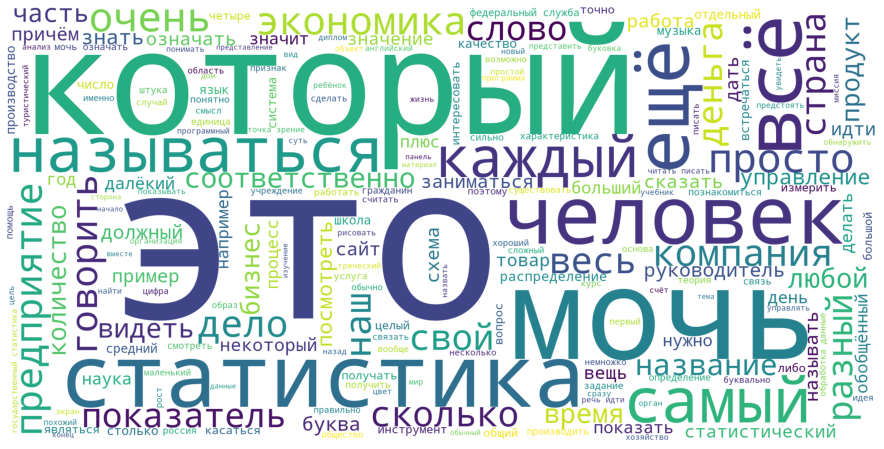

In [ ]:
# Облако слов
cloud = WordCloud(width=2000, height=1000, background_color='white', stopwords=stop_words).generate(t_lemm)
plt.figure(figsize=(16,8))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
x8

Word  Frequency
0              и        224
1            это        149
2             на        125
3            что        118
4                       104
...          ...        ...
2621   помещение          1
2622      помимо          1
2623    поминать          1
2624     помните          1
2625  объяснению          1

[2626 rows x 2 columns]

In [ ]:
t11 = t_lemm.split(" ")
t_filt=''
for word in t11:
  if not (word in stop_words):
    t_filt = t_filt + ' ' + word
t_filt

'  итак название наш предмет бизнес аналитика статистика это вроде разный дисциплина выясняться просто сторона вместе профессия область первый тема неделя момент начало напомнить однако закончиться спорт эпидемия вместо обычный который пока заняться сожаление просьба безопасность здоровье просто болеть человек мир это человек вопрос  указать адрес интернет адрес система дистанционный изучение готовить  всё помочь всё материал ссылка объявление обряд проходить конец семестр читать какой-то остаток материал сайт новый дата  всё знать кое-что дублировать сайт орк  просто случай выстаивать временно работать сайт проводиться технический работа общий мир именно штука работать медленный часть затяжка зум начать конец заканчиваться обработка данные представление передавать пример пример выводиться экран картиночка мочь называться информационный панель панель индикатор штука десять разный название показать какой-то обобщённый сведение работа наш пример это какой-то прибыль соотношение доход ана

In [ ]:
xx = ["и", "итак", "который", "это", "этот"]
for word in xx:
  print(f"{word}: {word in stop_words}")

и: True
итак: False
который: False
это: False
этот: True


In [ ]:
t_split = t_lemm.split(" ")
pd_lemm = pd.DataFrame(t_split)
freq = pd_lemm.value_counts()
pd_freq = pd.DataFrame(freq, columns=["Frequency"])
pd_freq.reset_index(inplace=True)
pd_freq.rename(columns={0: "Word"}, inplace=True)
pd_freq.sort_values(by="Word", inplace=True)
word_list = pd_freq["Word"].unique()
word_list[:50]

array(['', '-го', '-ой', 'а', 'абсурд', 'август', 'авто', 'автоинспекция',
       'автомобиль', 'автор', 'агент', 'агентство', 'агрегирование',
       'адрес', 'аккуратно', 'акр', 'акт', 'активно', 'алфавит',
       'альтернативный', 'альфа', 'альфа-самец', 'америка',
       'американский', 'анализ', 'аналитика', 'аналог', 'анархия',
       'английски', 'английский', 'анри', 'аня', 'аппаратный',
       'арктический', 'аромат', 'базовый', 'балтика', 'банк', 'бар',
       'беда', 'бедро', 'без', 'безопасность', 'безработица', 'бекка',
       'бесплатно', 'бесплатный', 'библиотека', 'бизнес',
       'бизнес-аналитик'], dtype=object)

In [ ]:
pd_freq.to_excel("word_list.xlsx")

In [ ]:
word_list.shape

(1749,)

In [ ]:
# Читаем файл Excel
pd_stop_words = pd.read_excel("/content/stop_words.xlsx")

In [ ]:
pd_stop_words.tail(5)

Word  Frequency
1634  электроника          1
1635     эпидемия          1
1636         этап          1
1637       язычок          1
1638         ящук          1

In [ ]:
my_stop_words = pd_stop_words.Word.values
my_stop_words

array(['и', 'это', 'мы', ..., 'этап', 'язычок', 'ящук'], dtype=object)

In [ ]:
my_stop_words = list(my_stop_words)

In [ ]:
t_lemm_list = t_lemm.split(" ")
t_filt=''
for word in t_lemm_list:
  if not (word in my_stop_words):
    t_filt = t_filt + ' ' + word
t_filt

'  бизнес аналитика статистика  система    общий обработка информационный индикатор обобщённый доход анализ график  руководитель информационный  средний объект руководитель управление характеристика продукт      продукт компания  продукт  бизнес  статистика статистика статистика график обработка    статистика инструмент инструмент статистика бизнес-аналитик статистика руководитель статистика деньга план бизнес-аналитика характеристика   деньга бизнес бизнес программа инструмент статистический анализ процесс программа     бизнес определение бизнес экономический предприятие учреждение фирма предприятие частный государственный коммерческий бизнес-аналитика анализ  федеральный государственный федеральный государственный статистика коммерческий деятельность инструмент организация  государственный статистика занятость       деньга общий информационный график инструмент  открытый правительство  открытый учреждение правительство закон  статистика закон бизнес-аналитика статистика  статистика  

In [ ]:
while t_filt.find("  ") > -1:
  t_filt = t_filt.replace("  ", " ")
t_filt

' бизнес аналитика статистика система общий обработка информационный индикатор обобщённый доход анализ график руководитель информационный средний объект руководитель управление характеристика продукт продукт компания продукт бизнес статистика статистика статистика график обработка статистика инструмент инструмент статистика бизнес-аналитик статистика руководитель статистика деньга план бизнес-аналитика характеристика деньга бизнес бизнес программа инструмент статистический анализ процесс программа бизнес определение бизнес экономический предприятие учреждение фирма предприятие частный государственный коммерческий бизнес-аналитика анализ федеральный государственный федеральный государственный статистика коммерческий деятельность инструмент организация государственный статистика занятость деньга общий информационный график инструмент открытый правительство открытый учреждение правительство закон статистика закон бизнес-аналитика статистика статистика план система инструмент отчётность ст

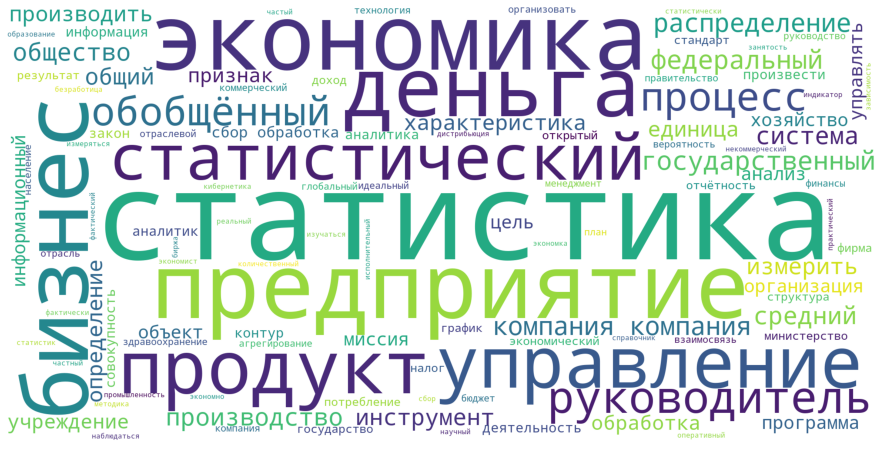

In [ ]:
# Облако слов
cloud = WordCloud(width=2000, height=1000, background_color='white').generate(t_filt)
plt.figure(figsize=(16,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

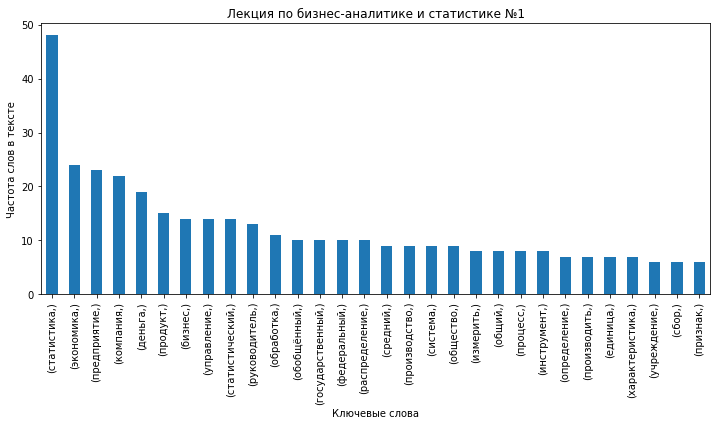

In [ ]:
pd_filt = pd.DataFrame(t_filt.split(" "), columns=["Word"])
Freqs = pd_filt.value_counts()
plt.figure(figsize=(12,5))
Freqs[:30].plot.bar()
plt.xlabel("Ключевые слова")
plt.ylabel("Частота слов в тексте")
plt.title("Лекция по бизнес-аналитике и статистике №1")
plt.show()

## Частотный анализ текста. Гистограмма и облако слов. Версия 2

Анализ расшифровки видеолекции по Бизнес-аналитике и статистике №1.

## Загрузка файла

In [ ]:
# Читаем текстовый файл
ff = open('/content/BI-01.txt', "r")
t0 = ff.read()

In [ ]:
# Размер текста - сравним со счетчиком MS Word
len(t0)

46934

In [ ]:
len?

In [ ]:
# Размер файла в байтах
!ls -la BI-01.txt

-rw-r--r-- 1 root root 87625 Jun 16 10:58 BI-01.txt


In [ ]:
87625 / 1024

85.5712890625

In [ ]:
# Начало файла
t0[:100]

'итак название нашего предмета бизнес\nаналитика и статистика это вроде как две\nразные дисциплины\nну к'

In [ ]:
# Заменим символ перевода строки на пробел 
t1 = t0.replace('\n',' ')
t1[:100]

'итак название нашего предмета бизнес аналитика и статистика это вроде как две разные дисциплины ну к'

In [ ]:
len(t1)

46933

In [ ]:
type(t0)

str

## Облако слов без обработки

In [ ]:
# Загружаем библиотеки
from wordcloud import WordCloud
import matplotlib.pyplot as plt

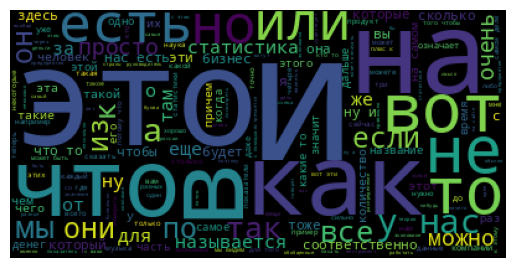

In [ ]:
# Облако слов по всему тексту
wordcloud = WordCloud().generate(t1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

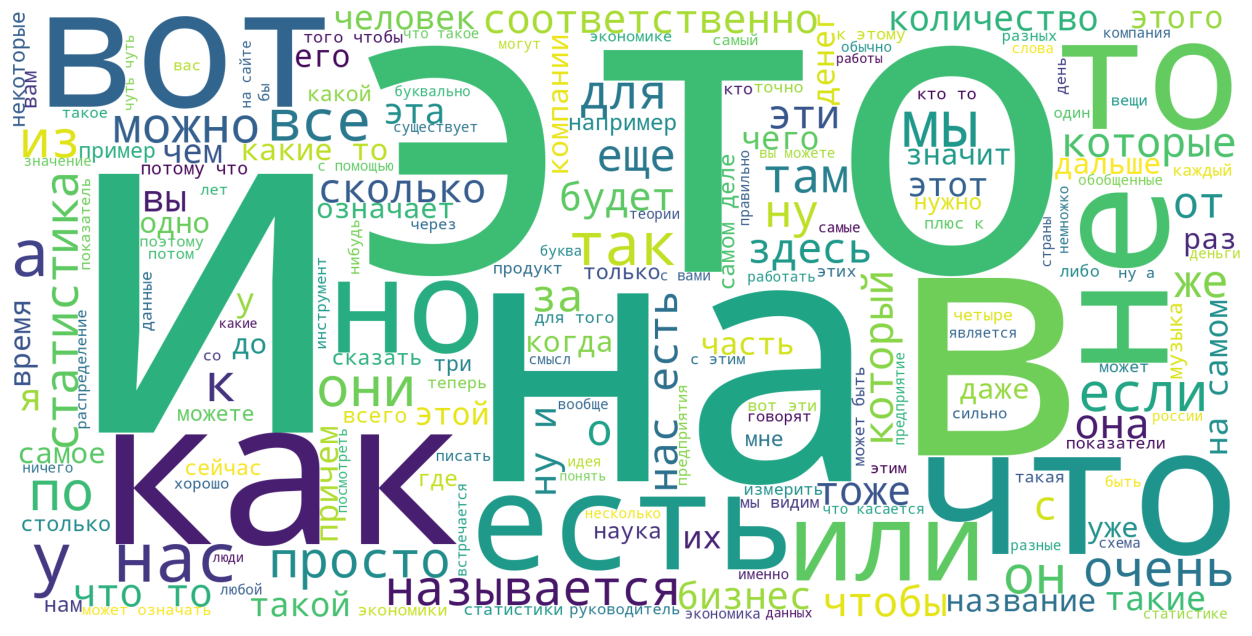

In [ ]:
# Белый фон, большие размеры
wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(t1)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
t2 = t1.split(" ")
t2[:10]

['итак',
 'название',
 'нашего',
 'предмета',
 'бизнес',
 'аналитика',
 'и',
 'статистика',
 'это',
 'вроде']

In [ ]:
import pandas as pd
x1 = pd.DataFrame(t2)
freq = x1.value_counts()
freq[:10]

и       224
это     149
на      125
что     118
в        92
как      91
вот      84
не       71
есть     70
нас      67
dtype: int64

In [ ]:
x2 = pd.DataFrame(freq, columns=["Frequency"])

In [ ]:
x2

Frequency
0                
и             224
это           149
на            125
что           118
в              92
...           ...
любите          1
лучшая          1
лучи            1
лозы            1
ящук            1

[2694 rows x 1 columns]

In [ ]:
x3 = x2.reset_index()
x3.rename(columns={0: "Word"}, inplace=True)
x3

Word  Frequency
0          и        224
1        это        149
2         на        125
3        что        118
4          в         92
...      ...        ...
2689  любите          1
2690  лучшая          1
2691    лучи          1
2692    лозы          1
2693    ящук          1

[2694 rows x 2 columns]

In [ ]:
x4 = x3.sort_values(by="Word")
x4.tail(6)

Word  Frequency
732     язык          2
1243   языкe          1
247    языке          4
731   языком          2
1242  язычки          1
2693    ящук          1

In [ ]:
x5 = x4.Word.unique()
x5[:200]

array(['', ',', '.', '1', '1-го', '10', '11', '2', '2-ой', '20', '239',
       '3', '30', '36', '37', '4', '4-го', '5', '50', '500', '6', '70',
       '9000', '[музыка]', 'ap', 'avanti', 'awards', 'b', 'be', 'bi',
       'business', 'call', 'cd', 'choco', 'cicada', 'classic', 'color',
       'come', 'cotto', 'dark', 'deity', 'dirol', 'distribution',
       'fashion', 'ford', 'freely', 'he', 'intelligence', 'iso', 'like',
       'microsoft', 'narod.ru', 'nuxe', 'of', 'omega', 'orbea', 'others',
       'pie', 'power', 'slow', 'teen', 'this', 'to', 'touch', 'up',
       'white', 'world', 'xi', 'xiii', 'z', 'а', 'абсурда', 'августа',
       'авто', 'автоинспекция', 'автомобиль', 'автомобиля', 'авторы',
       'агентов', 'агентство', 'агрегирование', 'агрегирования', 'адрес',
       'адреса', 'аккуратно', 'акра', 'акта', 'активно', 'алфавит',
       'алфавите', 'альтернативное', 'альфа', 'альфа-самец',
       'американские', 'американский', 'американских', 'американской',
       'америке', 

In [ ]:
# Оставим только буквы и пробелы
alpha = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя -"
t5=''.join(i for i in t1 if i in alpha)
t5

'итак название нашего предмета бизнес аналитика и статистика это вроде как две разные дисциплины ну как выясняется этот просто две стороны одного и того же вместе одной и той же профессии одно и то же области первой теме моему недели они как раз эти моменты начала я напомню ну однако когда закончится на спорта с эпидемией будет мы вместо обычной которые пока у нас заняться ну к сожалению по просьбе безопасности и здоровья не просто болеют люди мира это не люди вопросам будем хорошо у нас есть  указано три адреса интернете на самой адрес эта система дистанционного изучения готовим  все поможет все материалы ссылки объявления обряды проходите то чтобы в конце семестра не читали какие-то остатки материалов у нас на сайте новую дату  и все знаем мы кое-что я буду дублировать на сайте орков  просто на случай выстаивать временно не будет работать сайтов иногда там проводятся технические работы общей мир именно та штука но и работать медленнее или часть затяжка зум здесь и на начнем с конца ч

In [ ]:
t6 = t5.split(" ")
x6 = pd.DataFrame(t6)
freq = x6.value_counts()
x7 = pd.DataFrame(freq, columns=["Frequency"])
x8 = x7.reset_index()
x8.rename(columns={0: "Word"}, inplace=True)
x9 = x8.sort_values(by="Word")
x10 = x9.Word.unique()
x10[:100]

array(['', '-го', '-ой', 'а', 'абсурда', 'августа', 'авто',
       'автоинспекция', 'автомобиль', 'автомобиля', 'авторы', 'агентов',
       'агентство', 'агрегирование', 'агрегирования', 'адрес', 'адреса',
       'аккуратно', 'акра', 'акта', 'активно', 'алфавит', 'алфавите',
       'альтернативное', 'альфа', 'альфа-самец', 'американские',
       'американский', 'американских', 'американской', 'америке',
       'анализ', 'анализа', 'аналитика', 'аналоги', 'анархию',
       'английски', 'английские', 'английского', 'английское',
       'английском', 'анри', 'аня', 'аппаратными', 'арктические',
       'аромат', 'базовых', 'балтики', 'банка', 'банке', 'бар', 'бара',
       'бед', 'без', 'безопасности', 'безработицы', 'бекки', 'берем',
       'берет', 'беру', 'бесплатно', 'бесплатное', 'библиотеки', 'бизнес',
       'бизнес-аналитик', 'бизнес-аналитика', 'бизнес-аналитики',
       'бизнес-процесс', 'бизнес-процессах', 'бизнес-тренер', 'бизнеса',
       'бизнесе', 'билетный', 'бирже', 'блага

In [ ]:
x10.shape

(2626,)

## Лемматизация текста

Приводим слова к начальной / словарной форме

In [ ]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=e70153ba9f343216342caca68219a443fc0a9dec1e4507a9292cc7306aa9b1e4
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymorphy2
lemmatizer = pymorphy2.MorphAnalyzer()
t_lemm=''
for word in t6:
  word = lemmatizer.parse(word)
  t_lemm = t_lemm + ' ' + word[0].normal_form

In [ ]:
t_lemm

' итак название наш предмет бизнес аналитика и статистика это вроде как два разный дисциплина ну как выясняться этот просто два сторона один и тот же вместе один и тот же профессия один и то же область первый тема мой неделя они как раз этот момент начало я напомнить ну однако когда закончиться на спорт с эпидемия быть мы вместо обычный который пока у мы заняться ну к сожаление по просьба безопасность и здоровье не просто болеть человек мир это не человек вопрос быть хорошо у мы есть  указать три адрес интернет на сам адрес этот система дистанционный изучение готовить  всё помочь всё материал ссылка объявление обряд проходить то чтобы в конец семестр не читать какой-то остаток материал у мы на сайт новый дата  и всё знать мы кое-что я быть дублировать на сайт орк  просто на случай выстаивать временно не быть работать сайт иногда там проводиться технический работа общий мир именно тот штука но и работать медленный или часть затяжка зум здесь и на начать с конец чем заканчиваться обработ

In [ ]:
kr = lemmatizer.parse("красными")
kr

[Parse(word='красными', tag=OpencorporaTag('ADJF,Qual plur,ablt'), normal_form='красный', score=0.8, methods_stack=((DictionaryAnalyzer(), 'красными', 87, 25),)),
 Parse(word='красными', tag=OpencorporaTag('NOUN,anim,masc plur,ablt'), normal_form='красный', score=0.133333, methods_stack=((DictionaryAnalyzer(), 'красными', 227, 10),)),
 Parse(word='красными', tag=OpencorporaTag('NOUN,inan,neut,Geox plur,ablt'), normal_form='красное', score=0.066666, methods_stack=((DictionaryAnalyzer(), 'красными', 471, 10),))]

In [ ]:
print(kr[0])
print(kr[0].tag)
print(kr[0].normal_form)

Parse(word='красными', tag=OpencorporaTag('ADJF,Qual plur,ablt'), normal_form='красный', score=0.8, methods_stack=((DictionaryAnalyzer(), 'красными', 87, 25),))
ADJF,Qual plur,ablt
красный


In [ ]:
tx = "красный красным красных красное красными"
print (tx)
tz = tx.split(" ")
print(tz)
tt_lemm = ''
for word in tz:
  word = lemmatizer.parse(word)
  tt_lemm = tt_lemm + ' ' + word[0].normal_form
tt_lemm

красный красным красных красное красными
['красный', 'красным', 'красных', 'красное', 'красными']


' красный красный красный красный красный'

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('russian')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

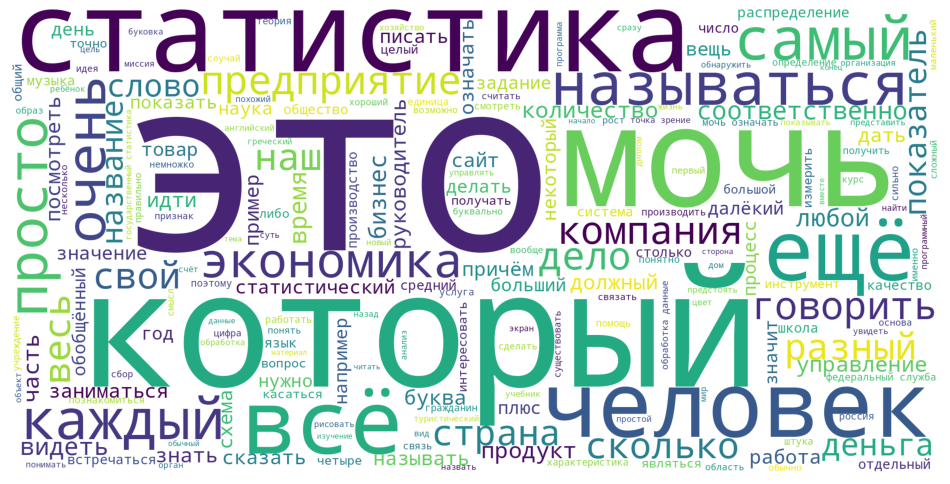

In [ ]:
# Облако слов с фильтрацией стоп-слов
cloud = WordCloud(width=2000, height=1000, 
                  background_color='white', 
                  stopwords=stop_words).generate(t_lemm)
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
x8

Word  Frequency
0             и        224
1           это        149
2            на        125
3           что        118
4                      105
...         ...        ...
2621     меняют          1
2622    меньшие          1
2623     меньше          1
2624  менингита          1
2625       ящук          1

[2626 rows x 2 columns]

In [ ]:
t11 = t_lemm.split(" ")
t_filt=''
for word in t11:
  if word not in stop_words:    
    t_filt = t_filt + ' ' + word
t_filt

'  итак название наш предмет бизнес аналитика статистика это вроде разный дисциплина выясняться просто сторона вместе профессия область первый тема неделя момент начало напомнить однако закончиться спорт эпидемия вместо обычный который пока заняться сожаление просьба безопасность здоровье просто болеть человек мир это человек вопрос  указать адрес интернет адрес система дистанционный изучение готовить  всё помочь всё материал ссылка объявление обряд проходить конец семестр читать какой-то остаток материал сайт новый дата  всё знать кое-что дублировать сайт орк  просто случай выстаивать временно работать сайт проводиться технический работа общий мир именно штука работать медленный часть затяжка зум начать конец заканчиваться обработка данные представление передавать пример пример выводиться экран картиночка мочь называться информационный панель панель индикатор штука десять разный название показать какой-то обобщённый сведение работа наш пример это какой-то прибыль соотношение доход ана

In [ ]:
xx = ["и", "итак", "который", "это", "этот", "наш"]
for word in xx:
  print(f"{word}: {word in stop_words}")

и: True
итак: False
который: False
это: False
этот: True
наш: False


In [ ]:
t_split = t_lemm.split(" ")
pd_lemm = pd.DataFrame(t_split)
freq = pd_lemm.value_counts()
pd_freq = pd.DataFrame(freq, columns=["Frequency"])
pd_freq.reset_index(inplace=True)
pd_freq.rename(columns={0: "Word"}, inplace=True)
pd_freq.sort_values(by="Word", inplace=True)
word_list = pd_freq["Word"].unique()
word_list[:50]

array(['', '-го', '-ой', 'а', 'абсурд', 'август', 'авто', 'автоинспекция',
       'автомобиль', 'автор', 'агент', 'агентство', 'агрегирование',
       'адрес', 'аккуратно', 'акр', 'акт', 'активно', 'алфавит',
       'альтернативный', 'альфа', 'альфа-самец', 'америка',
       'американский', 'анализ', 'аналитика', 'аналог', 'анархия',
       'английски', 'английский', 'анри', 'аня', 'аппаратный',
       'арктический', 'аромат', 'базовый', 'балтика', 'банк', 'бар',
       'беда', 'бедро', 'без', 'безопасность', 'безработица', 'бекка',
       'бесплатно', 'бесплатный', 'библиотека', 'бизнес',
       'бизнес-аналитик'], dtype=object)

In [ ]:
t_split = t_lemm.split(" ")
x = list(set(t_split)).sort()
x

In [ ]:
xx = ["и", "итак", "и", "который", "это", "этот", "наш"]
xx

['и', 'итак', 'и', 'который', 'это', 'этот', 'наш']

In [ ]:
s = set(xx)
s

{'и', 'итак', 'который', 'наш', 'это', 'этот'}

In [ ]:
l = list(s)
l

['это', 'наш', 'итак', 'и', 'этот', 'который']

In [ ]:
l.sort()
l

['и', 'итак', 'который', 'наш', 'это', 'этот']

In [ ]:
t_split = t_lemm.split(" ")
print(len(t_split), t_split[:10])

7206 ['', 'итак', 'название', 'наш', 'предмет', 'бизнес', 'аналитика', 'и', 'статистика', 'это']


In [ ]:
s = set(t_split)
print(len(s), s)

1749 {'', 'домашний', 'определённый', 'вы', 'с', 'ведение', 'западный', 'поиск', 'нога', 'про', 'опцион', 'методика', 'но', 'отношение', 'фраза', 'неприятность', 'лидер', 'защита', 'похожий', 'секунда', 'пицца', 'зарегистрировать', 'подразнить', 'измерять', 'ни', 'крупный', 'обзор', 'грязный', 'беда', 'воздействовать', 'базовый', 'объявить', 'национализм', 'вопрос', 'правда', 'а', 'тигр', 'буровой', 'распределяться', 'доступ', 'петля', 'разновидность', 'добиваться', 'сформулировать', 'зависимость', 'структура', 'представлять', 'зафиксировать', 'напоминать', 'оказаться', 'собственно', 'изъять', 'много', 'естественный', 'объяснить', 'помимо', 'огромный', 'прыжок', 'крутить', 'обводить', 'принятие', 'верить', 'палка', 'скуп', 'заглавный', 'туда', 'неважно', 'переводный', 'таков', 'управлять', 'анри', 'чтение', 'зарабатывать', 'досуг', 'неудобный', 'сталкиваться', 'информационный', 'шериф', 'часто', 'привычка', 'выкатиться', 'ждать', 'региональный', 'дрова', 'конечный', 'убираться', 'вещат

In [ ]:
x = list(s)
print(len(x), x[:10]) 

1749 ['', 'домашний', 'определённый', 'вы', 'с', 'ведение', 'западный', 'поиск', 'нога', 'про']


In [ ]:
x.sort()
print(len(x), x[:10])

1749 ['', '-го', '-ой', 'а', 'абсурд', 'август', 'авто', 'автоинспекция', 'автомобиль', 'автор']


In [ ]:
pdx = pd.DataFrame(x)
pdx.to_excel("word_list.xlsx")

In [ ]:
word_list.shape

(1749,)

In [ ]:
# Читаем файл Excel
pd_stop_words = pd.read_excel("/content/stop_words.xlsx", header=None)

In [ ]:
pd_stop_words.head(5)

0
0     -го
1     -ой
2       а
3  абсурд
4  август

In [ ]:
pd_stop_words.tail(5)

0
1673  являться
1674      явно
1675      язык
1676    язычок
1677      ящук

In [ ]:
my_stop_words = pd_stop_words.values.tolist()
my_stop_words[:5], my_stop_words[-5:], len(my_stop_words)

([['-го'], ['-ой'], ['а'], ['абсурд'], ['август']],
 [['являться'], ['явно'], ['язык'], ['язычок'], ['ящук']],
 1678)

In [ ]:
"абсурд" in my_stop_words

False

In [ ]:
["абсурд"] in my_stop_words

True

In [ ]:
t_filt=''
for word in t11:
  if not ([word] in my_stop_words):
    t_filt = t_filt + ' ' + word
t_filt

'  бизнес аналитика статистика  система    обработка данные индикатор обобщённый среднее   средний объект характеристика        бизнес  статистика статистика статистика обработка    статистика статистика бизнес-аналитик статистика статистика бизнес-аналитика характеристика показатель вычислять   бизнес бизнес программа статистический процесс программа     бизнес бизнес экономический государственный бизнес-аналитика  федеральный государственный федеральный государственный статистика  государственный статистика госкомстат       зарегистрировать зарегистрировать  правительство  правительство гражданин закон  статистика закон бизнес-аналитика статистика  статистика число  система отчётность практика   статистика международный закон технология         стандарт число          обобщённый характеристика показатель показатель обобщённый число среднее показатель обобщённый количественный число обобщённый характеристика экономика статистика статистика статистика статистика  статистика  число  ста

In [ ]:
while t_filt.find("  ") > -1:
  t_filt = t_filt.replace("  ", " ")
t_filt

' бизнес аналитика статистика система обработка данные индикатор обобщённый среднее средний объект характеристика бизнес статистика статистика статистика обработка статистика статистика бизнес-аналитик статистика статистика бизнес-аналитика характеристика показатель вычислять бизнес бизнес программа статистический процесс программа бизнес бизнес экономический государственный бизнес-аналитика федеральный государственный федеральный государственный статистика государственный статистика госкомстат зарегистрировать зарегистрировать правительство правительство гражданин закон статистика закон бизнес-аналитика статистика статистика число система отчётность практика статистика международный закон технология стандарт число обобщённый характеристика показатель показатель обобщённый число среднее показатель обобщённый количественный число обобщённый характеристика экономика статистика статистика статистика статистика статистика число статистика статистика федеральный структура государство статис

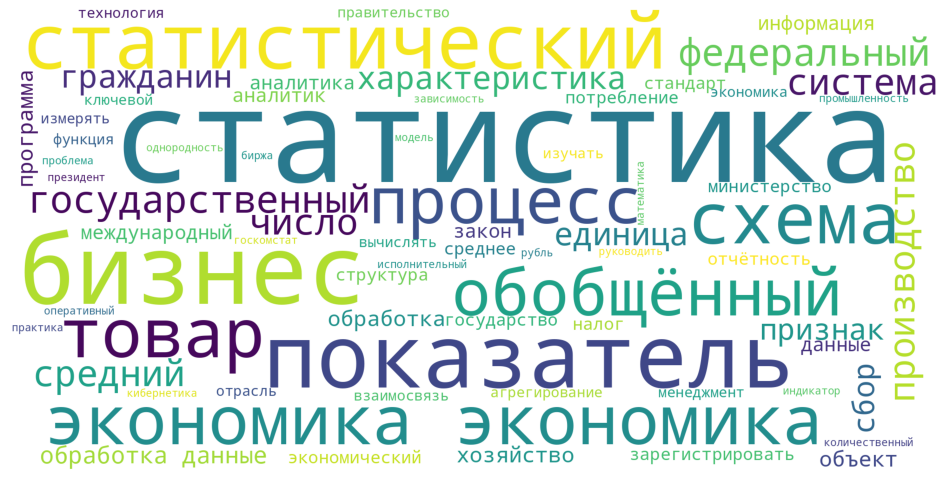

In [ ]:
# Облако слов
cloud = WordCloud(width=2000, height=1000, background_color='white').generate(t_filt)
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image

In [ ]:
import numpy as np

In [ ]:
circle_mask=np.array(Image.open("/content/circle-mask.jpg"))

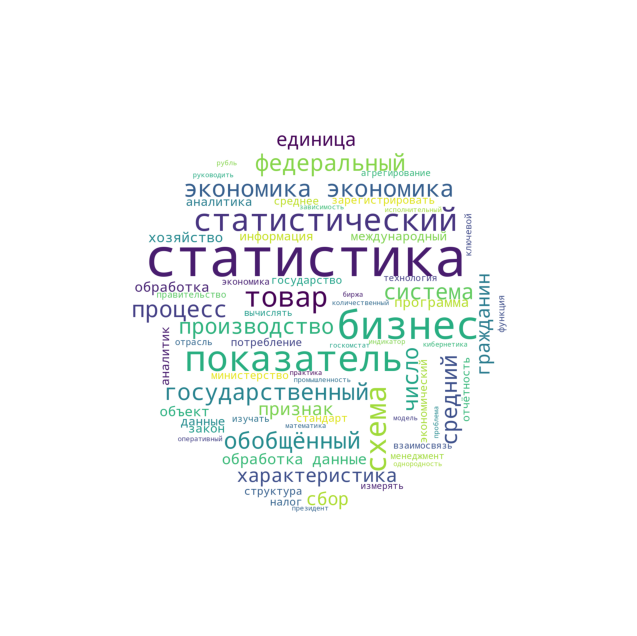

In [ ]:
# Облако слов по маске
cloud = WordCloud(width=2000, height=1000, 
                  background_color='white', 
                  mask=circle_mask).generate(t_filt)
plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file("circle_cloud.jpg")

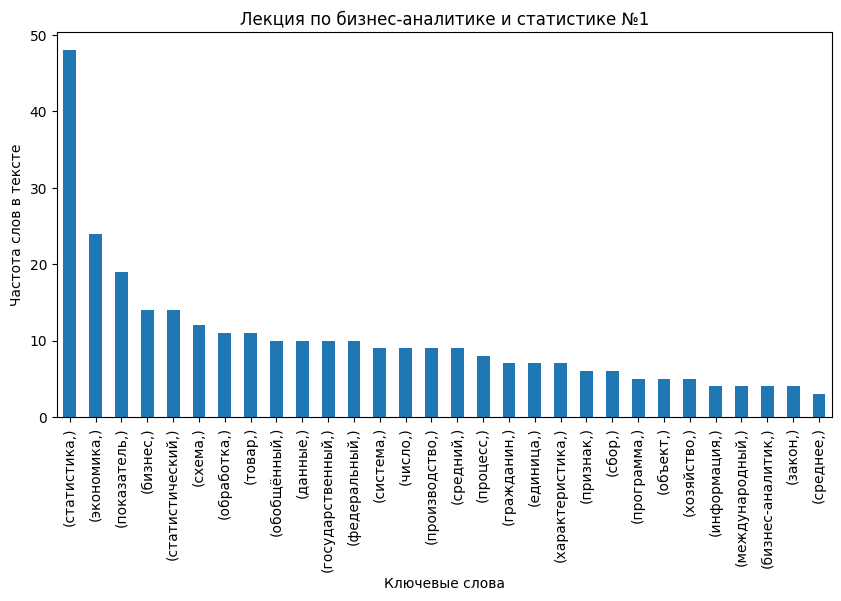

In [ ]:
pd_filt = pd.DataFrame(t_filt.split(" "), columns=["Word"])
Freqs = pd_filt.value_counts()
plt.figure(figsize=(10,5))
Freqs[:30].plot.bar()
plt.xlabel("Ключевые слова")
plt.ylabel("Частота слов в тексте")
plt.title("Лекция по бизнес-аналитике и статистике №1")
plt.show()

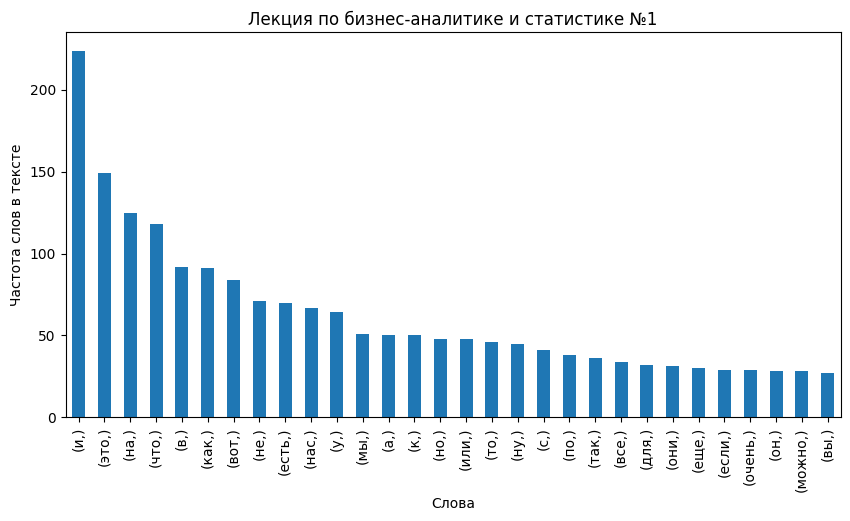

In [ ]:
pd_filt = pd.DataFrame(t1.split(" "), columns=["Word"])
Freqs = pd_filt.value_counts()
plt.figure(figsize=(10,5))
Freqs[:30].plot.bar()
plt.xlabel("Слова")
plt.ylabel("Частота слов в тексте")
plt.title("Лекция по бизнес-аналитике и статистике №1")
plt.show()

In [ ]:
ff = open('/content/OS.txt', "r")
t0 = ff.read()

In [ ]:
t0[:100]

'\n   \nВалентинЮльевичАрьков\nОперационныесистемы\nУчебноепособие\nИздательские решения\nПо лицензии Rider'

In [ ]:
t0 = t0.replace('\n',' ')
t0[:100]

'     ВалентинЮльевичАрьков Операционныесистемы Учебноепособие Издательские решения По лицензии Rider'

In [ ]:
t0 = t0.replace('  ',' ')
t0[:100]

' ВалентинЮльевичАрьков Операционныесистемы Учебноепособие Издательские решения По лицензии Ridero 20'

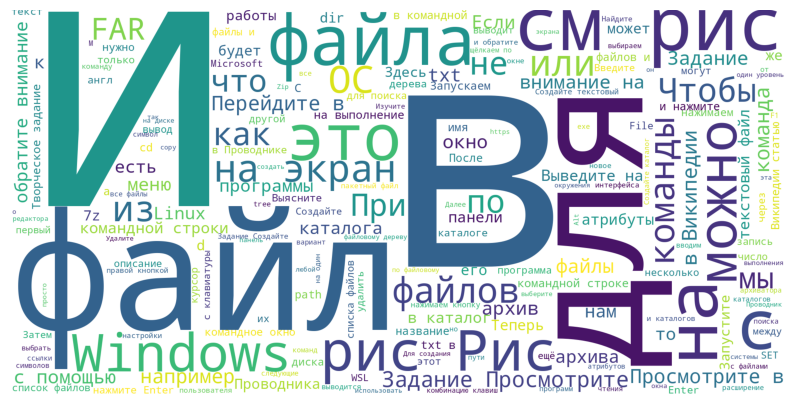

In [ ]:
wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate(t0)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()